# Assignment 13: LGBM & XGBM

# Exploratory Data Analysis (EDA):

1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
num_col = df.columns

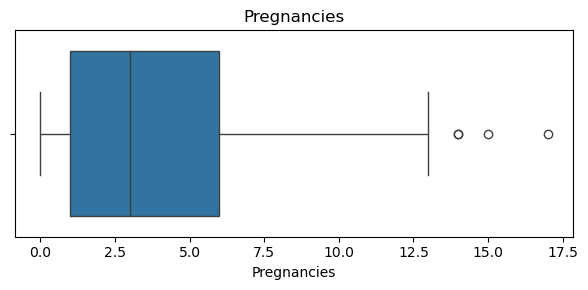

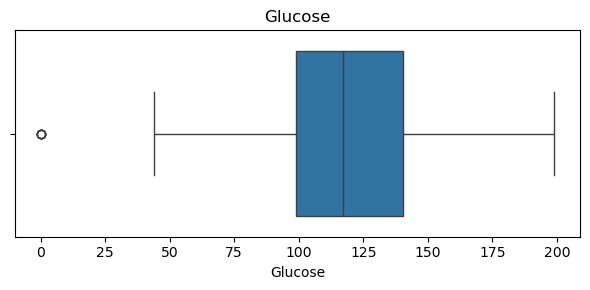

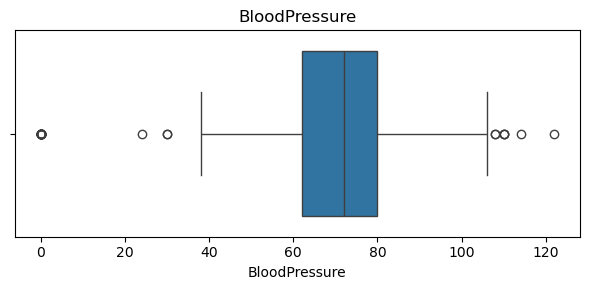

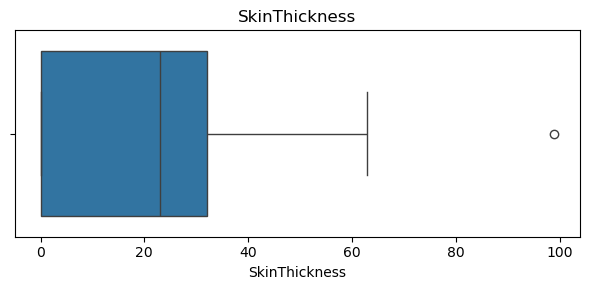

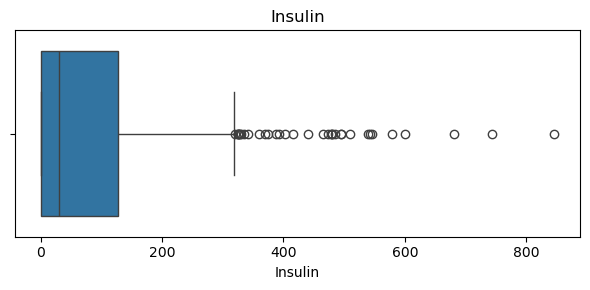

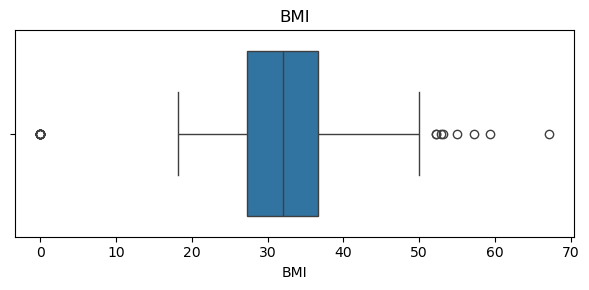

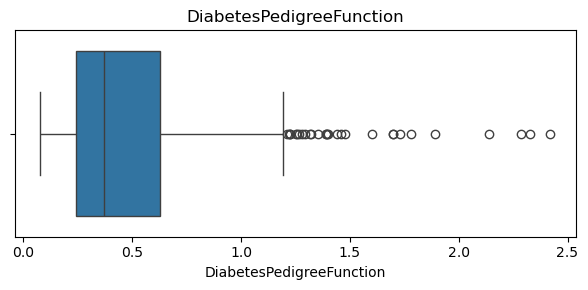

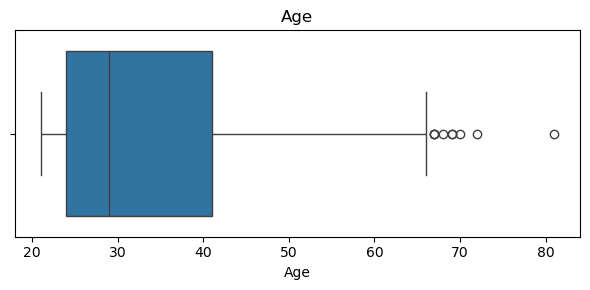

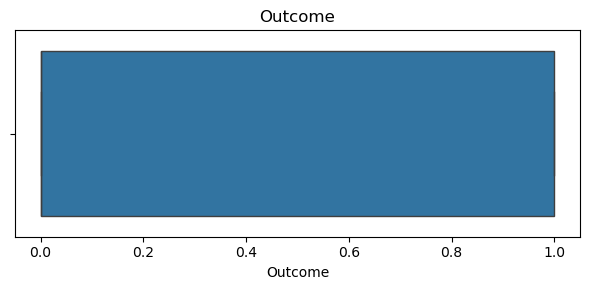

In [5]:
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"{col}")
    plt.tight_layout()
    plt.show()

<Figure size 1200x800 with 0 Axes>

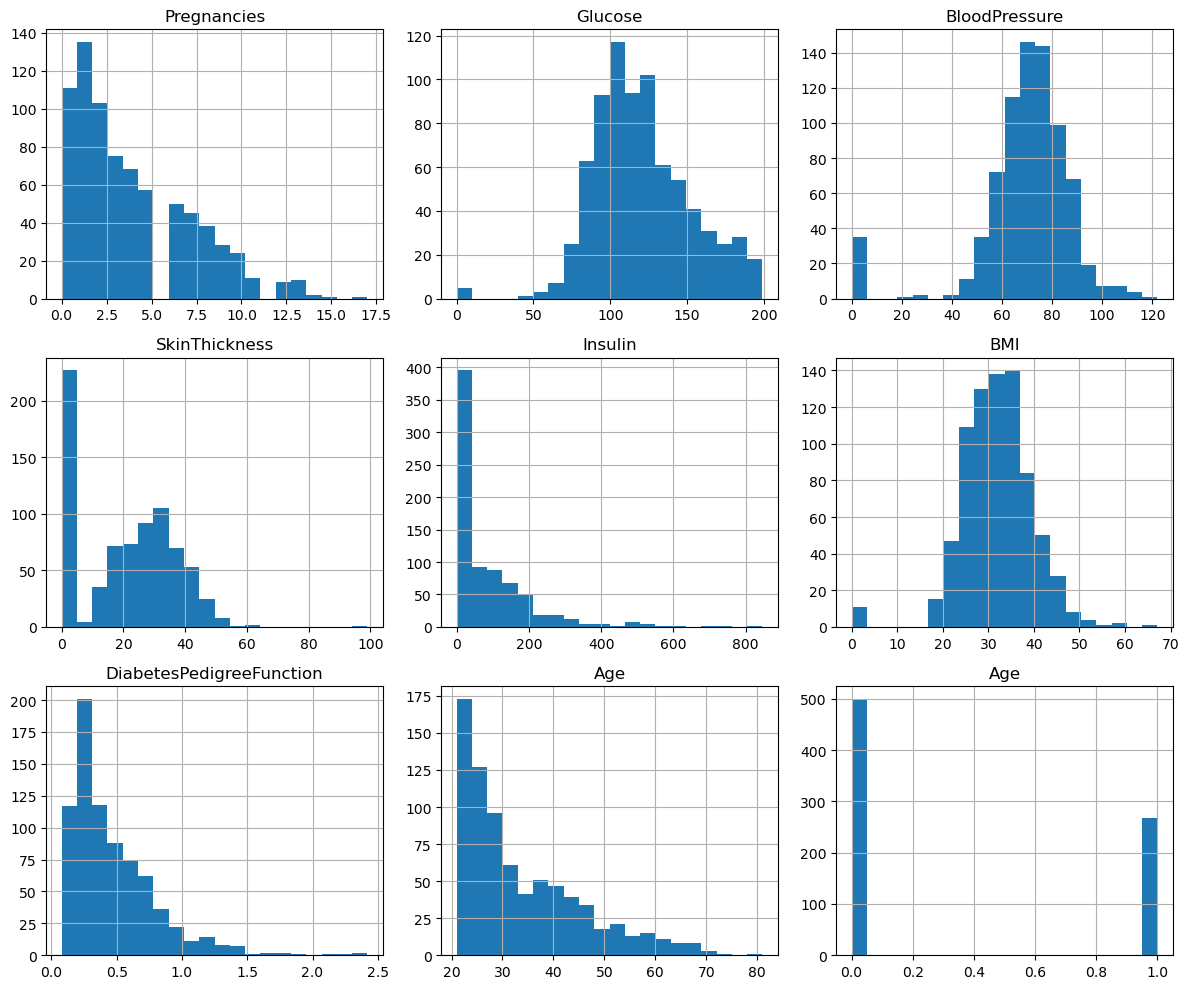

In [8]:
plt.figure(figsize=(12,8))
df[num_col].hist(bins=20, figsize=(12,10))
plt.title(f'{col}')
plt.tight_layout()
plt.show()

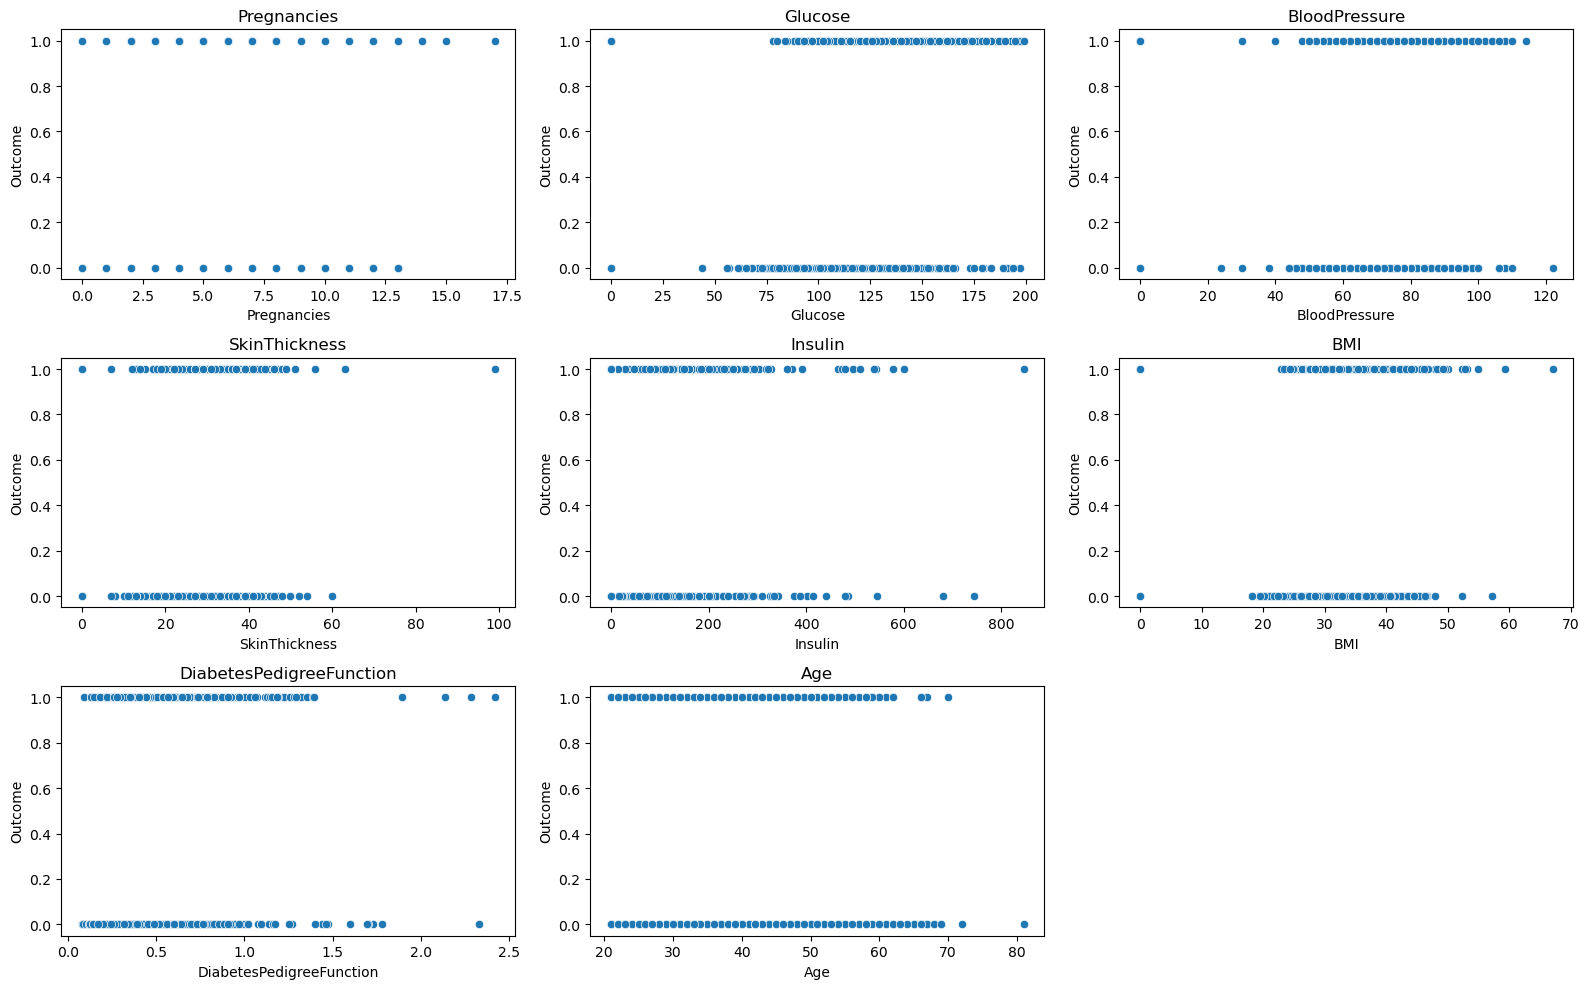

In [9]:
scatter_features = [
    'Pregnancies','Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age'
]

plt.figure(figsize=(16, 10))

for i, col in enumerate(scatter_features, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['Outcome'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Outcome')

plt.tight_layout()
plt.show()

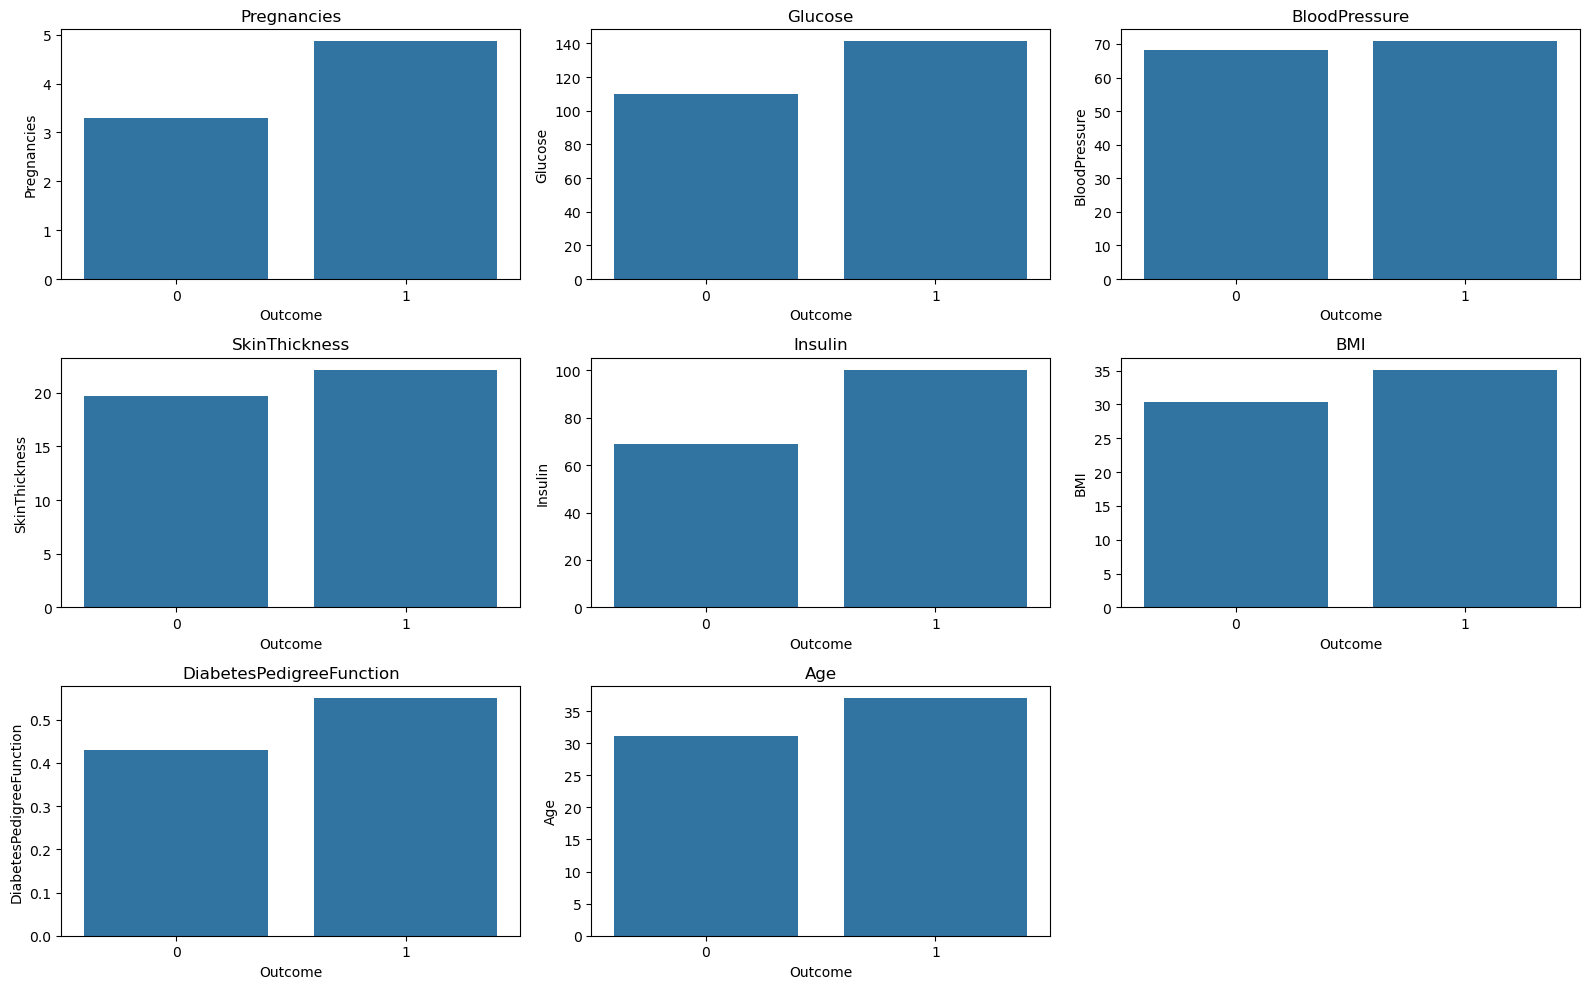

In [27]:
# Bar chart
bar_features = [
    'Pregnancies','Glucose','BloodPressure','SkinThickness',
    'Insulin','BMI','DiabetesPedigreeFunction','Age'
]
plt.figure(figsize=(16, 10))
for i, col in enumerate(bar_features, 1):
    plt.subplot(3, 3, i)
    sns.barplot(x=df['Outcome'], y=df[col], errorbar=None)
    plt.title(col)
    plt.xlabel('Outcome')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Data Preprocessing:

1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

 The dataset contains no missing values, so imputation is not required. All features are numerical, and the target variable is already binary encoded; hence, no categorical encoding is needed.
 

In [14]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Outcome', axis=1))

# Building Predictive Models:

1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [49]:
from sklearn.linear_model import LinearRegression 

model = LinearRegression() 
model.fit(X_train, y_train) 

y_pred = model.predict(X_test)

In [21]:
# 2.Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

In [22]:
y_pred = model.predict(X_test) 

In [24]:
y_pred_binary = (y_pred > 0.5).astype(int)  # Using 0.5 as threshold

In [25]:
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)

In [26]:
print("Accuracy :", accuracy)
print("Precision:", precision)
print("Recall   :", recall)
print("F1-score :", f1)

Accuracy : 0.7597402597402597
Precision: 0.6607142857142857
Recall   : 0.6727272727272727
F1-score : 0.6666666666666666


In [29]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("\nConfusion Matrix:\n", cm)


Confusion Matrix:
 [[80 19]
 [18 37]]


In [30]:
# Detailed Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_binary))


Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [31]:
#3.	Build predictive models using LightGBM and XGBoost algorithms.
#LGBM 
from lightgbm import LGBMClassifier

In [32]:
# LGBM Classifier
lgbm_model = LGBMClassifier(
    n_estimators=100,
    max_depth=1,
    learning_rate=0.1,
    random_state=42,
    verbose=-1
)

In [34]:
lgbm_model.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [35]:
y_pred_train_lgbm = lgbm_model.predict(X_train)
y_pred_test_lgbm = lgbm_model.predict(X_test)

In [38]:
training_accuracy_lgbm = accuracy_score(y_train, y_pred_train_lgbm)
test_accuracy_lgbm = accuracy_score(y_test, y_pred_test_lgbm)

In [39]:

print("LightGBM - Training Accuracy:", round(training_accuracy_lgbm, 2))
print("LightGBM - Test Accuracy:", round(test_accuracy_lgbm, 2))

LightGBM - Training Accuracy: 0.8
LightGBM - Test Accuracy: 0.77


In [40]:
#XGboost
import xgboost as xgb

In [41]:
# XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=1,
    learning_rate=0.1,
    random_state=42,
)

In [43]:
xgb_model.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [44]:
y_pred_train_xgb = xgb_model.predict(X_train)
y_pred_test_xgb = xgb_model.predict(X_test)

In [45]:
training_accuracy_xgb = accuracy_score(y_train, y_pred_train_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_pred_test_xgb)

In [46]:
print("XGBoost - Training Accuracy:", round(training_accuracy_xgb, 2))
print("XGBoost - Test Accuracy:", round(test_accuracy_xgb, 2))

XGBoost - Training Accuracy: 0.79
XGBoost - Test Accuracy: 0.77


In [50]:
#4.Train the models on the training set and evaluate their performance on the testing set.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [51]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(kernel='rbf'),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}
results = {}

In [64]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

In [56]:
# Display results
for model, metrics in results.items():
    print(f"\n{model}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Logistic Regression
Accuracy: 0.7468
Precision: 0.6379
Recall: 0.6727
F1-score: 0.6549

SVM
Accuracy: 0.7662
Precision: 0.7209
Recall: 0.5636
F1-score: 0.6327

Decision Tree
Accuracy: 0.7468
Precision: 0.6250
Recall: 0.7273
F1-score: 0.6723

Random Forest
Accuracy: 0.7208
Precision: 0.6071
Recall: 0.6182
F1-score: 0.6126


Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

- Cross-validation → reliability

- GridSearchCV → optimal parameters

- F1 & Recall → medical dataset focus

In [58]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [59]:
# Logistic Regression with Cross-Validation
lr = LogisticRegression(max_iter=1000)

cv_scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='f1')
print("Logistic Regression CV F1-score:", cv_scores.mean())

Logistic Regression CV F1-score: 0.6239200493393907


In [60]:
param_grid = {
    'C': [0.1, 1, 10]
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='f1'
)

grid.fit(X_train, y_train)

print("Best Parameter:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Parameter: {'C': 10}
Best CV Score: 0.6240550480728033


In [62]:
#Evaluate Tuned Model on Test Set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

In [63]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.7467532467532467
Recall: 0.6727272727272727
F1-score: 0.6548672566371682


Comparative Analysis:

1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.


In [70]:
 from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [71]:
# Initialize models
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lgbm = LGBMClassifier(random_state=42)

In [72]:
# Train models
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train)

C:\Users\lenovo\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [20:13:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [73]:
# Predictions
y_pred_xgb = xgb.predict(X_test)
y_pred_lgbm = lgbm.predict(X_test)

In [74]:
results = {
    "XGBoost": {
        "Accuracy": accuracy_score(y_test, y_pred_xgb),
        "Precision": precision_score(y_test, y_pred_xgb),
        "Recall": recall_score(y_test, y_pred_xgb),
        "F1-score": f1_score(y_test, y_pred_xgb)
    },
    "LightGBM": {
        "Accuracy": accuracy_score(y_test, y_pred_lgbm),
        "Precision": precision_score(y_test, y_pred_lgbm),
        "Recall": recall_score(y_test, y_pred_lgbm),
        "F1-score": f1_score(y_test, y_pred_lgbm)
    }
}

In [75]:
results_df = pd.DataFrame(results)
print(results_df)

            XGBoost  LightGBM
Accuracy   0.720779  0.720779
Precision  0.590909  0.593750
Recall     0.709091  0.690909
F1-score   0.644628  0.638655


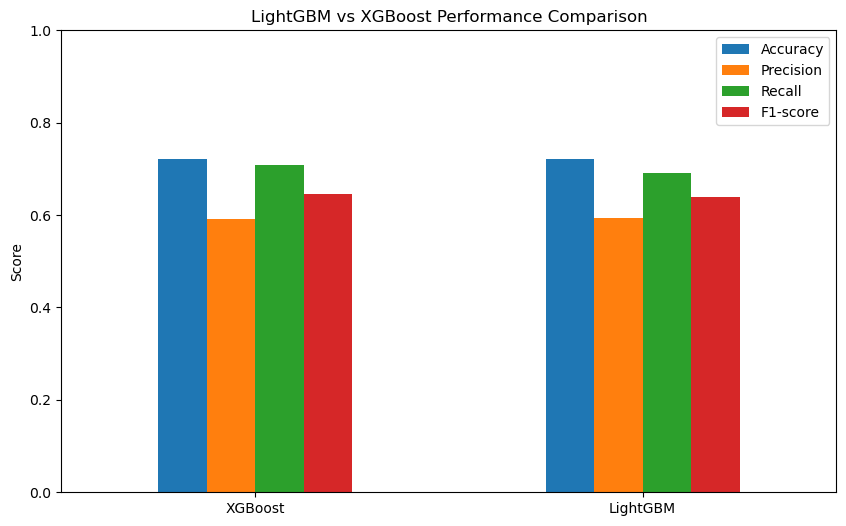

In [77]:
results_df.T.plot(kind='bar', figsize=(10,6))
plt.title("LightGBM vs XGBoost Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.ylim(0,1)
plt.show()

Conculsion:

- Both models generalize equally well on unseen data.

- Performance difference is negligible in terms of accuracy.

- LightGBM is preferred for faster training, while XGBoost is preferred for stability and robustness.

# LightGBM

Strengths

- Faster training due to leaf-wise tree growth.

- Efficient memory usage and high scalability.

- Performs well on large datasets.

- Achieves competitive accuracy with fewer training iterations.

Weaknesses

- Can overfit on small datasets if not tuned properly.

- Sensitive to hyperparameter settings.

- Less robust to noisy data compared to XGBoost.

# XGBoost
Strengths

Strong regularization techniques reduce overfitting.

Highly robust and stable model performance.

Handles complex feature interactions effectively.

Provides consistent performance across different datasets.

❌ Weaknesses

Slower training compared to LightGBM.

Higher computational and memory cost.

Requires more time for hyperparameter tuning